<a href="https://colab.research.google.com/github/gianlukas/modellazioneSistIng/blob/main/6_1_Equazioni_Differenziali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corso di Modellazione dei Sistemi Ingegneristici

prof. Gianluca Solazzo

email: gianluca.solazzo@unisalento.it

<a target="_blank" href="https://colab.research.google.com/github/mikexcohen/MasterMathByCodingInPython/blob/main/algebra_1/mathWithPython_algebra1_addPolys.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Equazioni differenziali ordinarie

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [3]:
from sympy import *

ODE class:  separable
          2
        -t 
f(t) = ℯ   


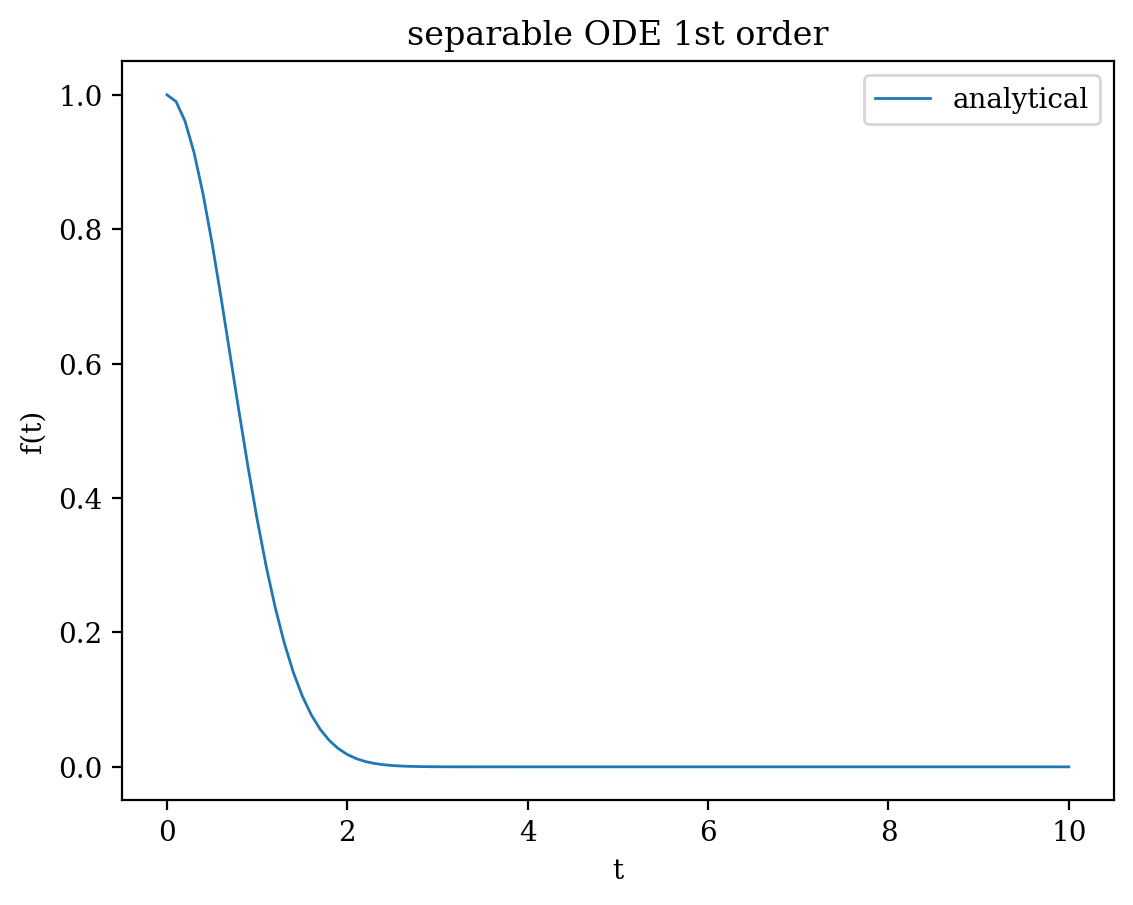

In [4]:
#@title Equazioni differenziali del primo ordine

import numpy as np
import matplotlib.pyplot as plt

from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

eq = Eq(f(t).diff(t), -2 * t * f(t))
an_sol = dsolve(eq, ics={f(0): 1})  #Definisco l'equazione differenziale ordinaria del primo ordine separabile.
print('ODE class: ', classify_ode(eq)[0])  #Risolve l'equazione differenziale specificata con la condizione iniziale f(0)=1 e memorizza la soluzione analitica.
pprint(an_sol)

#  Definiscono il dominio della variabile indipendente t e il numero di campioni nel dominio.
t_begin=0.
t_end=10.
t_nsamples=101
t_space = np.linspace(t_begin, t_end, t_nsamples)

lmbd_sol = lambdify(t, an_sol.rhs)  # Crea una funzione lambda che valuta la soluzione analitica f(t) in base al valore di t.
x_an_sol = lmbd_sol(t_space)  # Calcola i valori della soluzione analitica f(t)

plt.figure()
plt.plot(t_space, x_an_sol, linewidth=1, label='analytical')
plt.title('separable ODE 1st order')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

# Equazioni differenziali del secondo ordine

## Oscillatore armonico smorzato

Scenari applicativi dell'oscillatore armonico smorzato:


* Strutture edilizie: nel contesto di edifici alti, l'oscillazione causata dai venti e da attività sismiche minori può rappresentare una sfida per l'integrità strutturale. Gli oscillatori armonici smorzati aiutano a identificare i meccanismi di smorzamento appropriati per mitigare tali oscillazioni e salvaguardare le strutture.
* Sospensioni dell'auto: come accennato in precedenza, il sistema di sospensione di un'auto agisce come un oscillatore armonico smorzato. Il meccanismo di smorzamento all'interno degli ammortizzatori aiuta a dissipare l'energia dalle oscillazioni causate dalle imperfezioni della strada, con conseguente miglioramento del comfort di guida e della manovrabilità.
* Ingegneria dei ponti: simili alle strutture edilizie, i ponti sono un altro esempio di sistemi strutturali che possono trarre vantaggio dalla comprensione degli oscillatori armonici smorzati. Le oscillazioni del ponte indotte da forze esterne, come il vento o il traffico, possono essere mitigate implementando l'appropriato meccanismo di smorzamento per prevenire deformazioni o cedimenti catastrofici.
* Pendolo dell'orologio: il movimento dei pendoli in un orologio è influenzato da forze di smorzamento, come la resistenza dell'aria. Il comportamento del pendolo può essere rappresentato come un oscillatore armonico smorzato, consentendo una migliore comprensione del suo movimento e dell'efficienza del cronometraggio.
* Cuffie: nel mondo della tecnologia audio, le cuffie utilizzano la tecnologia di cancellazione del rumore per ridurre al minimo i suoni ambientali indesiderati producendo onde sonore contrastanti. Gli oscillatori armonici smorzati possono aiutare a modellare l'algoritmo di cancellazione del rumore, con conseguente miglioramento delle prestazioni del prodotto.

L'equazione dell'oscillatore armonico smorzato è un'equazione differenziale del secondo ordine data da:

mx''(t) + cx'(t) + kx(t) = 0,

in cui:
* m rappresenta la massa,
* c è il coefficiente di smorzamento,
* k è la costante della molla,
* x(t) è lo spostamento dall'equilibrio,
* x'(t) è la velocità
* x''(t) è l'accelerazione.

Riscriviamo l'equazione, ponendo:
* $\frac{c}{2m}=γ$
* $ω_0 = (\frac{k}{m})^(0,5)$ cioè la radice quadrata del rapporto tra k e m

In [ ]:
t, omega0 = sympy.symbols("t, omega_0", positive=True)
gamma = sympy.symbols("gamma", complex=True)

x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)


ode

                               2      
       d            2         d       
2⋅γ⋅ω₀⋅──(x(t)) + ω₀ ⋅x(t) + ───(x(t))
       dt                      2      
                             dt       

In [ ]:
ode_sol = sympy.dsolve(ode)

ode_sol

                ⎛        ________⎞             ⎛       ________⎞
                ⎜       ╱  2     ⎟             ⎜      ╱  2     ⎟
           ω₀⋅t⋅⎝-γ + ╲╱  γ  - 1 ⎠       -ω₀⋅t⋅⎝γ + ╲╱  γ  - 1 ⎠
x(t) = C₁⋅ℯ                        + C₂⋅ℯ                       

### Condizioni iniziali

In [ ]:
def apply_ics(sol, ics, x, known_params):
    """
    Applica le condizioni iniziali (ics), date come dizionario nella forma
    ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...} alle soluzione dell'ODE
    con variabile indipendente x. Le costanti di integrazione indeterminate
    C1, C2, ... vengono estratte dai simboli liberi della soluzione ODE,
    escludendo i simboli nell'elenco dei parametri_conosciuti.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [ ]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [ ]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])

x_t_sol

                                    ⎛       ________⎞                         
                                    ⎜      ╱  2     ⎟                         
       ⎛        γ         1⎞  -ω₀⋅t⋅⎝γ + ╲╱  γ  - 1 ⎠   ⎛      γ         1⎞  ω
x(t) = ⎜- ───────────── + ─⎟⋅ℯ                        + ⎜───────────── + ─⎟⋅ℯ 
       ⎜       ________   2⎟                            ⎜     ________   2⎟   
       ⎜      ╱  2         ⎟                            ⎜    ╱  2         ⎟   
       ⎝  2⋅╲╱  γ  - 1     ⎠                            ⎝2⋅╲╱  γ  - 1     ⎠   

    ⎛        ________⎞
    ⎜       ╱  2     ⎟
₀⋅t⋅⎝-γ + ╲╱  γ  - 1 ⎠
                      
                      
                      
                      

In [ ]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)

x_t_critical

            -ω₀⋅t
(ω₀⋅t + 1)⋅ℯ     

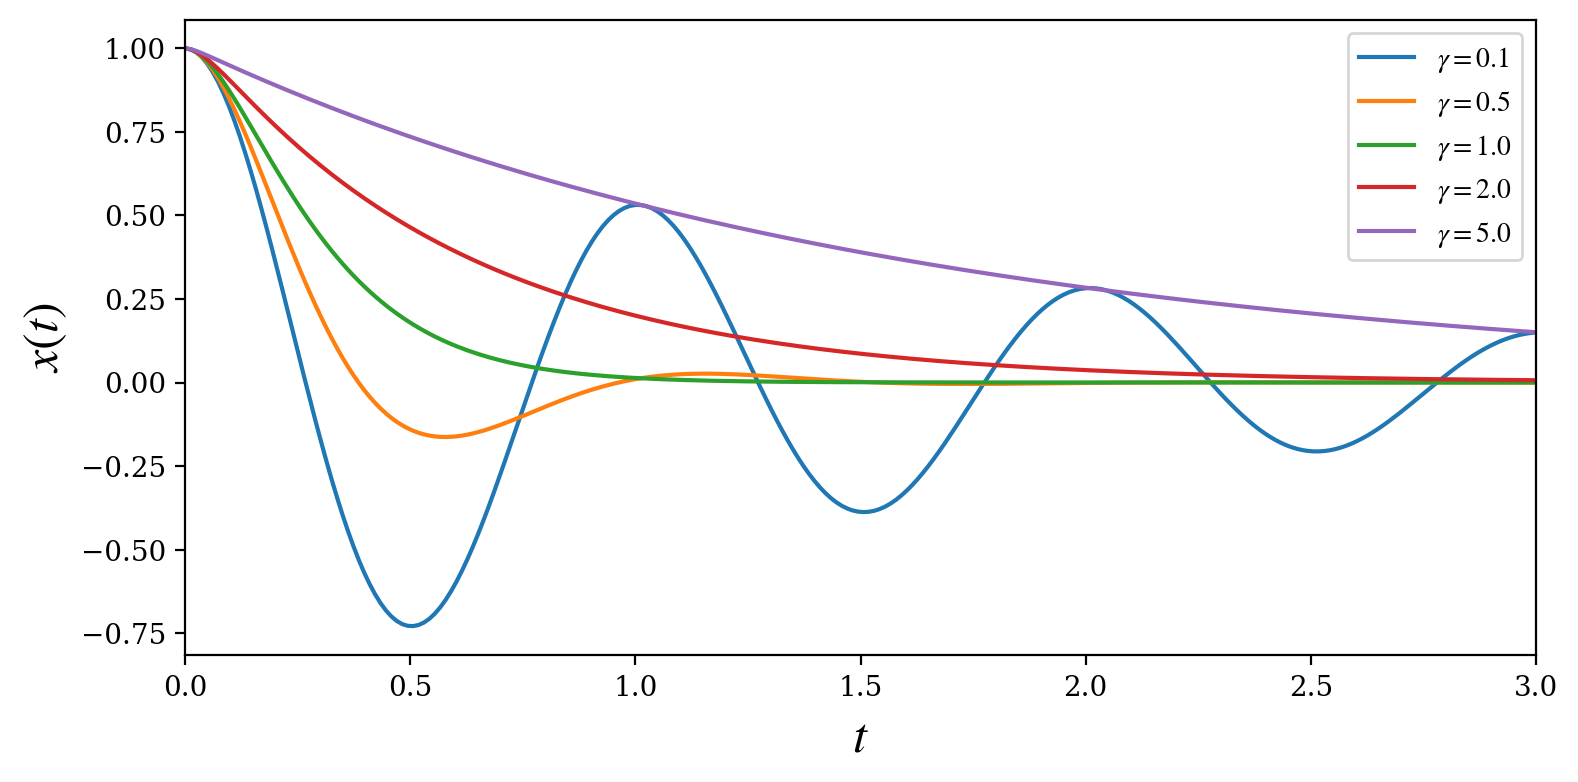

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 3, 250)
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: 2.0 * sympy.pi}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: 2.0 * sympy.pi, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.set_xlim(0, 3)
ax.legend()

fig.tight_layout()
fig.savefig('ch9-harmonic-oscillator.pdf')